# Pulmonary Excipients Database

## 1. Project Goal and Context

This project outlines a complete data analysis workflow, starting with the extraction of raw data from a source file and culminating in a comprehensive analytical report. The primary goal is to **transform unstructured data into a structured database** suitable for sophisticated analysis, ultimately aiming to discover **statistically significant trends and comparisons**.

This notebook serves two key functions:

1.  **Analytical Tool:** To perform rigorous **data cleaning, standardization, and exploratory analysis (EDA)**.
2.  **Portfolio Documentation:** To meticulously detail every step of the analytical process, showcasing **robust problem-solving and technical proficiency** in data manipulation and modeling.

## 2. Methodology Overview

The analysis will follow a guided project approach, ensuring that all data processing decisions are fully documented and justifiable. The core phases covered will include:

* **Data Acquisition & Structuring:** Loading the raw file and transforming it into a functional DataFrame/database structure.
* **Data Preparation:** Implementing necessary **data cleaning** routines (handling missing values, outliers, and inconsistencies) and **standardization** techniques to ensure data integrity.
* **Exploratory Data Analysis (EDA):** Generating visualizations and summary statistics to identify initial patterns, distribution characteristics, and potential areas of interest.
* **Trend Analysis & Comparison:** Focusing on developing specific hypotheses, performing targeted statistical tests, and generating **actionable insights** that contribute to the scientific narrative.

## 1\. Data Acquisition and Preparation

### 1.1. LLM-Assisted Data Extraction

The foundational dataset for this analysis was generated through **Large Language Model (LLM) processing** of a review manuscript. Given the unstructured nature of the source text (a written document detailing pharmaceutical excipients), an LLM was employed to perform **Information Extraction (IE)**.

The LLM was tasked with systematically identifying, categorizing, and normalizing key properties—such as **chemical name, function, and regulatory status**—from the raw text. This process resulted in a comprehensive, semi-structured database, which significantly expedited the data structuring phase.

### 1.2. Loading the Extracted Database

The resulting structured data has been saved as a module (`excipients_database`), containing the primary DataFrame, `df_excipients`. This DataFrame serves as the starting point for all subsequent cleaning, transformation, and analysis steps.

In [49]:
import pandas as pd
import re
from excipients_database import df_excipients

df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Reducing_Character,Primary_Function,Melting_Point_Info,Molecular_Weight_Info
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,Not_Mentioned,High,Yes,Carrier,Not_Mentioned,Not_Mentioned
1,EXC002,Mannitol,Polyol,FDA_Approved,Low,Low,No,Stabilizer/Osmotic_Agent,Not_Mentioned,Not_Mentioned
2,EXC003,Glucose,Monosaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Yes,Carrier,Not_Mentioned,Not_Mentioned
3,EXC004,Glycine,Amino_Acid,FDA_Approved,Not_Mentioned,Low,Not_Applicable,Bulking_Agent,Not_Mentioned,0.25-1000_kDa
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Not_Applicable,Shell_Former/Surfactant,High,Not_Mentioned
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Not_Applicable,Stabilizer/Carrier,Not_Mentioned,Not_Mentioned
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,Not_Mentioned,Not_Mentioned,No,Stabilizer/Mucoadhesive,Not_Mentioned,Not_Mentioned
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,No,Mucoadhesive/Gelling_Agent,Not_Mentioned,Not_Mentioned
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,Not_Mentioned,Not_Applicable,Surfactant/Stabilizer,Low_semi-solid,Not_Mentioned
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,Not_Mentioned,Not_Applicable,Surface_Modifier/Stabilizer,Not_Mentioned,Not_Mentioned


## 2\. Initial Data Exploration: The `df_excipients` Snapshot

Following the LLM extraction, the dataset containing **43 unique excipients** was successfully loaded into the DataFrame `df_excipients`. This initial inspection confirms the structure of the data and highlights areas needing immediate cleaning.

### 2.1. Structure and Content

The DataFrame consists of **43 rows** and **10 columns**, primarily focused on the physical, chemical, and functional properties of pharmaceutical excipients.

**Key Columns Identified:**

  * **Identifier:** `Excipient_ID` (Unique identifier).
  * **Categorical:** `Excipient_Name`, `Chemical_Category`, `Approval_Status`, `Primary_Function`.
  * **Properties:** `Tg_C` (Glass Transition Temp), `Hygroscopicity`, `Reducing_Character`, `Melting_Point_Info`, `Molecular_Weight_Info`.

## 3\. Data Cleaning and Feature Reduction

The initial exploration revealed several columns containing qualitative text that required standardization or removal to facilitate quantitative analysis. The following steps focus on **simplifying categorical variables** and performing **early feature reduction** by removing less informative columns.

### 3.1. Standardizing Categorical Data

The `Approval_Status` column contained the category **'FDA\_Approved\_Limited'** for a single excipient (EXC015). For the scope of this project, which focuses on broad safety classification, this category was **standardized** to the dominant **'FDA\_Approved'** status. This simplifies the variable into a binary form, improving model interpretability later.

### 3.2. Removing Ambiguous or Low-Value Features

Several property columns were found to be highly sparse or contained information that would be exceptionally tedious to convert into a usable numerical format:

  * **`Reducing_Character`:** This column was removed as the boolean classification (Yes/No) was insufficient for predictive modeling and the presence of **'Not\_Applicable'** values introduced noise.
  * **`Melting_Point_Info`** and **`Molecular_Weight_Info`:** These columns contained highly heterogeneous and descriptive text (e.g., "0.25-1000\_kDa," "Low\_semi-solid"). Due to the low number of entries (43 rows), the effort required for accurate numerical extraction and imputation outweighs the potential predictive gain, making them prime candidates for **feature reduction** at this stage.

These steps leave us with a cleaner, more focused dataset ready for in-depth handling of missing numerical data and comprehensive Exploratory Data Analysis (EDA).

In [50]:
# Change the "FDA_Approved_Limited" to "FDA_Approved"
df_excipients['Approval_Status'] = df_excipients['Approval_Status'].replace('FDA_Approved_Limited', 'FDA_Approved')
df_excipients[df_excipients['Excipient_ID']=='EXC015']

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Reducing_Character,Primary_Function,Melting_Point_Info,Molecular_Weight_Info
14,EXC015,Titanium_Dioxide,Inorganic_Oxide,FDA_Approved,Not_Applicable,Not_Mentioned,Not_Applicable,Excipient,Not_Mentioned,Not_Mentioned


In [51]:
# Remove the unusefull collumns
df_excipients= df_excipients.drop(['Reducing_Character','Melting_Point_Info', 'Molecular_Weight_Info'], axis=1)
df_excipients.columns

Index(['Excipient_ID', 'Excipient_Name', 'Chemical_Category',
       'Approval_Status', 'Tg_C', 'Hygroscopicity', 'Primary_Function'],
      dtype='object')

## 4\. Data Enrichment: Sourcing External Scientific Literature

A critical step in dealing with sparse or missing data is **data enrichment**. Initial exploration showed that the **`Tg_C` (Glass Transition Temperature)** column was heavily dominated by "Not\_Mentioned" values, which is detrimental to any property-based analysis.

To address this, we are incorporating data from a relevant scientific publication: **Weers, J. G., Tarara, T. E., & Clark, A. R. (2007). *Design of fine particles for pulmonary drug delivery***.

The following code uses the `PyPDF2` library to programmatically access and extract text from a specific page of the document. This text output will be manually inspected or further processed to locate and extract the required Glass Transition Temperature values, which will then be used to populate and enrich the `df_excipients` DataFrame.

In [52]:
# Install library (run once)
#!pip install PyPDF2

# Read the PDF
import PyPDF2

In [53]:
# Open the PDF file
with open('weers2007.pdf', 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)

    #Get the specific page object using the index
    selected_page = pdf_reader.pages[6]
    
    # 3. Extract the text from ONLY that page
    pdf_text = selected_page.extract_text()

print(pdf_text)

Weers, Tarara & Clark
Expert Opin. Drug Deliv.  (2007) 4(3) 303excipients, such as sugars and polyols [85]. The second involves
the formation of a highly viscous ‘vitreous’ liquid thatimmobilizes the protein 
[86]. It is likely th at both mechanisms
are operative in many formulations.
An optimal glass-forming agent has the following
characteristics. First, it should be unreactive. Reducing sugars,such as glucose and lactose, sh ould be avoided, as they can
react with amino groups on proteins (Maillard reaction),often leading to protein inac tivation and a characteristic
brown discoloration in the powder. Second, the stabilizershould be a good glass former , with a high glass transition
temperature (T
g). Table 1  catalogs the dry Tg of a number of
glass-forming agents. Tg values are typically measured by
differential scanning calorimetry [87]. Glasses exbibit a
transition from the glassy state to a more disordered rubberystate with increasing temperature. Below T
g, there is a gradual


## 5\. Programmatic Extraction of $T_g$ Data

The text extracted from the scientific article PDF (Weers et al., 2007) was unstructured. To transform this raw text into a usable table of Glass Transition Temperatures ($T_g$), a series of data parsing steps were executed:

1.  **Line Segmentation & Target Isolation:** The raw text (`pdf_text`) was split into individual lines, and the precise section containing the excipient names and their corresponding $T_g$ values was isolated.
2.  **Custom Parsing Function:** A Python function (`split_before_number`) was developed using regular expressions (`re`) to robustly separate the excipient name (a string) from the first instance of a numerical temperature value.
3.  **Name Standardization (Crucial for Merging):** To ensure a clean match with the primary DataFrame (`df_excipients`), spaces within the excipient names in the new `dry_tgs_df` were systematically replaced with **underscores (`_`)**. This ensures that excipient names like "Calcium Chloride" and "Calcium\_Chloride" are correctly identified as the same entity during the upcoming data merge.
4.  **Cleaning and Formatting:** Minor text artifacts introduced during the PDF-to-text conversion were manually removed.
5.  **DataFrame Construction:** The cleaned, structured list of excipient names and their $T_g$ values was finally converted into a new pandas DataFrame, `dry_tgs_df`. This table is now ready to be merged back into our primary dataset, `df_excipients`, to fill the critical missing values.

In [54]:
all_lines = pdf_text.split('\n')
all_lines

['Weers, Tarara & Clark',
 'Expert Opin. Drug Deliv.  (2007) 4(3) 303excipients, such as sugars and polyols [85]. The second involves',
 'the formation of a highly viscous ‘vitreous’ liquid thatimmobilizes the protein ',
 '[86]. It is likely th at both mechanisms',
 'are operative in many formulations.',
 'An optimal glass-forming agent has the following',
 'characteristics. First, it should be unreactive. Reducing sugars,such as glucose and lactose, sh ould be avoided, as they can',
 'react with amino groups on proteins (Maillard reaction),often leading to protein inac tivation and a characteristic',
 'brown discoloration in the powder. Second, the stabilizershould be a good glass former , with a high glass transition',
 'temperature (T',
 'g). Table 1  catalogs the dry Tg of a number of',
 'glass-forming agents. Tg values are typically measured by',
 'differential scanning calorimetry [87]. Glasses exbibit a',
 'transition from the glassy state to a more disordered rubberystate with 

In [55]:
start = all_lines.index('Excipient Dry Tg  (°C)')
end = all_lines.index('Tg: Glass transition temperature.')
dry_tgs = all_lines[start:end]
dry_tgs

['Excipient Dry Tg  (°C)',
 'Glycerol -93.0',
 'Sorbitol -3.0',
 'Glucose 38.2Maltose 100.6',
 'Trehalose 117.0',
 'Sucrose 73.4Raffinose 112.6',
 'Lactose 111.8',
 'Mannitol 11.0Trehalose esters 42.0 – 110.0',
 'Leucine 140.0',
 'Trileucine 70.0 – 100.0 depending on ',
 'pH',
 'Sodium citrate dihydrate 170.0 (pH > 7), ',
 '11.0 (pH < 3)',
 'Ficoll 110.0',
 'Dextran 83.0',
 'Maltotriose 76.0Galactose 10.0',
 'Xylose -10.0',
 'Ribose -10.0']

In [56]:
# Function to split a string before the first number
def split_before_number(s):
    match = re.search(r'(-?\d+\.\d+)', s)  # Find the first number
    if match:
        # Split before the number
        before = s[:match.start()].rstrip()  # Part before the number (strip trailing spaces)
        number = match.group(1)  # The number itself
        return [before, number]
    else:
        return [s]  # Return the original string if no number is found

# Apply the function to each string
result = [split_before_number(s) for s in dry_tgs]

# Print the result
dry_tgs = []
for sublist in result:
    dry_tgs.append(sublist)
dry_tgs

[['Excipient Dry Tg  (°C)'],
 ['Glycerol', '-93.0'],
 ['Sorbitol', '-3.0'],
 ['Glucose', '38.2'],
 ['Trehalose', '117.0'],
 ['Sucrose', '73.4'],
 ['Lactose', '111.8'],
 ['Mannitol', '11.0'],
 ['Leucine', '140.0'],
 ['Trileucine', '70.0'],
 ['pH'],
 ['Sodium citrate dihydrate', '170.0'],
 ['', '11.0'],
 ['Ficoll', '110.0'],
 ['Dextran', '83.0'],
 ['Maltotriose', '76.0'],
 ['Xylose', '-10.0'],
 ['Ribose', '-10.0']]

In [57]:
dry_tgs.remove(['', '11.0']) 
dry_tgs.remove(['pH'])
dry_tgs

[['Excipient Dry Tg  (°C)'],
 ['Glycerol', '-93.0'],
 ['Sorbitol', '-3.0'],
 ['Glucose', '38.2'],
 ['Trehalose', '117.0'],
 ['Sucrose', '73.4'],
 ['Lactose', '111.8'],
 ['Mannitol', '11.0'],
 ['Leucine', '140.0'],
 ['Trileucine', '70.0'],
 ['Sodium citrate dihydrate', '170.0'],
 ['Ficoll', '110.0'],
 ['Dextran', '83.0'],
 ['Maltotriose', '76.0'],
 ['Xylose', '-10.0'],
 ['Ribose', '-10.0']]

In [58]:
dry_tgs[0][0]

'Excipient Dry Tg  (°C)'

In [59]:
dry_tgs[0] = dry_tgs[0][0].split(' ', 1)
dry_tgs

[['Excipient', 'Dry Tg  (°C)'],
 ['Glycerol', '-93.0'],
 ['Sorbitol', '-3.0'],
 ['Glucose', '38.2'],
 ['Trehalose', '117.0'],
 ['Sucrose', '73.4'],
 ['Lactose', '111.8'],
 ['Mannitol', '11.0'],
 ['Leucine', '140.0'],
 ['Trileucine', '70.0'],
 ['Sodium citrate dihydrate', '170.0'],
 ['Ficoll', '110.0'],
 ['Dextran', '83.0'],
 ['Maltotriose', '76.0'],
 ['Xylose', '-10.0'],
 ['Ribose', '-10.0']]

In [60]:
dry_tgs_df = pd.DataFrame(dry_tgs[1:], columns=dry_tgs[0])
dry_tgs_df

,Excipient,Dry Tg (°C)
0,Glycerol,-93.0
1,Sorbitol,-3.0
2,Glucose,38.2
3,Trehalose,117.0
4,Sucrose,73.4
5,Lactose,111.8
6,Mannitol,11.0
7,Leucine,140.0
8,Trileucine,70.0
9,Sodium citrate dihydrate,170.0


In [61]:
# Replace spaces with underscores in the name columns
dry_tgs_df['Excipient'] = dry_tgs_df['Excipient'].str.replace(' ', '_')
dry_tgs_df

,Excipient,Dry Tg (°C)
0,Glycerol,-93.0
1,Sorbitol,-3.0
2,Glucose,38.2
3,Trehalose,117.0
4,Sucrose,73.4
5,Lactose,111.8
6,Mannitol,11.0
7,Leucine,140.0
8,Trileucine,70.0
9,Sodium_citrate_dihydrate,170.0


In [62]:
dry_tgs_df.columns

Index(['Excipient', 'Dry Tg  (°C)'], dtype='object')

In [63]:
 df_excipients.head()

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,Not_Mentioned,High,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,Low,Low,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,Not_Mentioned,Low,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant


## 6\. Merging External $T_g$ Data and Manual Standardization

This step completes the data enrichment process by **merging** the newly extracted $T_g$ values from `dry_tgs_df` into the primary DataFrame, `df_excipients`.

### 6.1. Conditional Merging of $T_g$ Values

We perform a targeted merge to address the sparseness of the `Tg_C` column:

1.  We iterate through the names and $T_g$ values in the small, external table (`dry_tgs_df`).
2.  We **conditionally update** the `df_excipients` only where the `Excipient_Name` matches **AND** the existing `Tg_C` value is one of the designated placeholder strings ("Not\_Mentioned," "High," or "Low").
3.  This ensures that only the missing or qualitatively described $T_g$ values are replaced with the newly sourced numerical data, preserving any $T_g$ values that were already numeric.

### 6.2. Manual Correction for Name Discrepancies

Due to differences in nomenclature between the original manuscript and the external source, two manual corrections were necessary to ensure the high-quality external data was fully utilized:

  * **L-leucine:** The name **"L-leucine"** in `df_excipients` was manually mapped to **"Leucine"** in `dry_tgs_df`.
  * **Sodium Citrate:** The name **"Sodium Citrate"** was considered equivalent to **"Sodium\_Citrate\_Dihydrate"** (from the external source) and its corresponding $T_g$ value was applied.

These manual corrections are based on domain knowledge and ensure maximum data coverage before proceeding to the final numerical standardization.

In [64]:
for idx, row in dry_tgs_df.iterrows():
    excipient = row['Excipient']
    dry_tg = row['Dry Tg  (°C)']  # Note the two spaces before (°C)
    
    # Find matching excipient in df_excipients and fill "Not_mentioned" Tg values
    mask = (df_excipients['Excipient_Name'] == excipient) & (df_excipients['Tg_C'].isin(['Not_Mentioned', "High", "Low"]))
    df_excipients.loc[mask, 'Tg_C'] = dry_tg
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,High,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,Low,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,Not_Mentioned,Low,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,Not_Mentioned,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,Not_Mentioned,Surface_Modifier/Stabilizer


In [65]:
df_excipients.loc[df_excipients['Excipient_Name'] == "L-leucine", 'Tg_C'] = (dry_tgs_df.loc[dry_tgs_df['Excipient'] == "Leucine", 'Dry Tg  (°C)'].iloc[0])
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,High,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,Low,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,Not_Mentioned,Low,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,Not_Mentioned,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,Not_Mentioned,Surface_Modifier/Stabilizer


In [66]:
dry_tgs_df.loc[dry_tgs_df['Excipient'] == "Sodium_citrate_dihydrate", 'Dry Tg  (°C)'].iloc[0]

'170.0'

In [67]:
df_excipients.loc[df_excipients['Excipient_Name'] == "Sodium_Citrate", 'Tg_C'] = (dry_tgs_df.loc[dry_tgs_df['Excipient'] == "Sodium_citrate_dihydrate", 'Dry Tg  (°C)'].iloc[0])
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,High,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,Low,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,Not_Mentioned,Low,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,Not_Mentioned,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,Not_Mentioned,Surface_Modifier/Stabilizer


## 7\. Second-Source Data Enrichment and Advanced Parsing

To further minimize data sparsity and maximize the utility of the **`Tg_C`** column, a **second external publication** (`reported_Tgs.pdf`) was utilized. This source required a different, more complex parsing strategy due to its table structure.

### 7.1. Targeted Extraction and Text Splitting

The analysis followed these advanced text processing steps:

1.  **PDF Access:** The target page was extracted using `PyPDF2`, similar to the previous step.
2.  **Delimited Splitting:** The raw text was systematically split using delimiters specific to the source document (first by `']'`, and then by a number followed by a space) to correctly separate **Excipient Name** and **$T_g$ value** pairs that were laid out in a multi-column format.
3.  **Numerical Validation:** Regular expressions were used to strictly validate that the separated values were actual numbers (including negative integers or decimals), filtering out extraneous text artifacts.

### 7.2. Abbreviation Mapping and Fuzzy Matching

After structuring the new $T_g$ data into the `Tg_df` DataFrame, a sophisticated lookup strategy was implemented for the merge:

  * **Abbreviation Mapping:** A dictionary (`abbreviation_map`) was created to resolve common excipient acronyms (e.g., 'DSPC', 'HPMC') to their full chemical names.
  * **Fuzzy Matching Function:** A custom function (`find_tg`) was developed to perform a **partial string match**. This allows the system to find $T_g$ values even if the name in our main table is slightly different from the name in the source table (e.g., matching "Poly(lactic acid)" to an index label containing "Poly(lactic acid)").
  * **Conditional Update:** This function was applied **only** to the remaining rows in `df_excipients` where `Tg_C` was still marked as **'Not\_Mentioned'** after the first enrichment step.

This rigorous, two-stage data enrichment process has substantially reduced the number of missing $T_g$ values, significantly improving the quality of the dataset for subsequent numerical analysis.

In [68]:
# Open the PDF file
with open('reported_Tgs.pdf', 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)

    #Get the specific page object using the index
    selected_page = pdf_reader.pages[4]
    
    # 3. Extract the text from ONLY that page
    pdf_text = selected_page.extract_text()

print(pdf_text)

86 Asian Journal of Pharmaceutics - April-June 2009Jadhav, et al.: Glass transition temperature
Example: Tgs of polystyrene and poly(methyl methacrylate).[46]
Branching[3,10,21]
Increased branching gives rise to decreased mobility of 
polymer chains and increased chain rigidity results in 
high Tg.
Example: Tgs of polystyrene and poly (methyl methacrylate).[3]
Bond interactions[3]
High secondary forces due to the high polarity or hydrogen 
bonding lead to strong crystalline forces that require high 
temperatures for melting. So, these high secondary forces 
give rise to high Tg due to the decreased mobility of 
amorphous polymer chains.
Functionality[3]
Mono functional aliphatic monomers due to high flexibility exhibit low Tg.
Example: Isooctyl acrylate, tridecyl acrylate, laurylacrylate. 
Higher functionality materials have similar molecular weights 
due to higher cross-link density results in higher Tg.
Alkyl chain length[5]
Increase in alkyl chain length results in high Tg values.
E

In [69]:
all_lines = pdf_text.split('\n')
all_lines

['86 Asian Journal of Pharmaceutics - April-June 2009Jadhav, et al.: Glass transition temperature',
 'Example: Tgs of polystyrene and poly(methyl methacrylate).[46]',
 'Branching[3,10,21]',
 'Increased branching gives rise to decreased mobility of ',
 'polymer chains and increased chain rigidity results in ',
 'high Tg.',
 'Example: Tgs of polystyrene and poly (methyl methacrylate).[3]',
 'Bond interactions[3]',
 'High secondary forces due to the high polarity or hydrogen ',
 'bonding lead to strong crystalline forces that require high ',
 'temperatures for melting. So, these high secondary forces ',
 'give rise to high Tg due to the decreased mobility of ',
 'amorphous polymer chains.',
 'Functionality[3]',
 'Mono functional aliphatic monomers due to high flexibility exhibit low Tg.',
 'Example: Isooctyl acrylate, tridecyl acrylate, laurylacrylate. ',
 'Higher functionality materials have similar molecular weights ',
 'due to higher cross-link density results in higher Tg.',
 'Alkyl c

In [70]:
all_lines[27]

'Polymers and drug molecules Tg (°C) Polymers and drug molecules Tg (°C)'

In [71]:
tgs_lines = all_lines[28::]
tgs_lines

['Polyethylene (low density)[47]-110 Sucrose[32]56.6',
 'Polyethylene (high density)[47]-90 Lactose[32]101.2',
 'Polypropylene (atactic)[47]-18 Maltose[32]87',
 'Polyvinyl acetate[7]28 Fructose[32,63]100',
 'Polyvinyl alcohol[7,48]85 Maltodextrin DE 20[32]141',
 'Polyvinyl chloride[47]87 Maltodextrin DE 25[32]121',
 'Poly ethylene Glycol 400 (PEG 400)[49]41 Maltodextrin DE 36[32]100',
 'Polydimethylsiloxanes[50]-127 Chewing gum[62]Between 0 to 37',
 'Polybutadiene[10]-85 Galactose[32,63]110',
 'Polystyrene[5,7,47,51]100 Xylose[32,63]9',
 'Poly (oxyethylene)[52]-67 Glycerol[32,63]-93',
 'Poly (oxymethylene)[52]-55 Sorbitol[32]-2',
 'Poly (acrylic acid)[52]106 Simvastatin[64]Lower Tg',
 'Poly (methyl acrylate)[52]8 Felodipine[65]42.7',
 'Poly (methyl methacrylate) (atactic)[7]105 Nimodipine[66]20',
 'Poly (butyl methacrylate)[2]20 Nifedipine[67]48',
 'Poly (butyl acrylate) (PBA)[53]-50 Indomethacin[68,69]42',
 'Poly vinyl Pyrrolidone (PVP)[4]168 Amorphous sodium indomethacin[70]121',
 'P

In [72]:
first_split = []

for line in tgs_lines:
    columns = line.split(']')  
    first_split.append(columns)
        
first_split

[['Polyethylene (low density)[47', '-110 Sucrose[32', '56.6'],
 ['Polyethylene (high density)[47', '-90 Lactose[32', '101.2'],
 ['Polypropylene (atactic)[47', '-18 Maltose[32', '87'],
 ['Polyvinyl acetate[7', '28 Fructose[32,63', '100'],
 ['Polyvinyl alcohol[7,48', '85 Maltodextrin DE 20[32', '141'],
 ['Polyvinyl chloride[47', '87 Maltodextrin DE 25[32', '121'],
 ['Poly ethylene Glycol 400 (PEG 400)[49', '41 Maltodextrin DE 36[32', '100'],
 ['Polydimethylsiloxanes[50', '-127 Chewing gum[62', 'Between 0 to 37'],
 ['Polybutadiene[10', '-85 Galactose[32,63', '110'],
 ['Polystyrene[5,7,47,51', '100 Xylose[32,63', '9'],
 ['Poly (oxyethylene)[52', '-67 Glycerol[32,63', '-93'],
 ['Poly (oxymethylene)[52', '-55 Sorbitol[32', '-2'],
 ['Poly (acrylic acid)[52', '106 Simvastatin[64', 'Lower Tg'],
 ['Poly (methyl acrylate)[52', '8 Felodipine[65', '42.7'],
 ['Poly (methyl methacrylate) (atactic)[7', '105 Nimodipine[66', '20'],
 ['Poly (butyl methacrylate)[2', '20 Nifedipine[67', '48'],
 ['Poly (but

In [73]:
# Function to split the second element of each sublist
def split_after_number(sublist):
    second_element = sublist[1]
    match = re.search(r'(-?\d+)\s', second_element)  # Find the number followed by a space
    if match:
        number = match.group(1)
        rest = second_element[match.end():]
        return [sublist[0], number, rest] + sublist[2:]
    else:
        return sublist  # Return the sublist unchanged if no match is found

# Apply the function to each sublist
result = [split_after_number(sublist) for sublist in first_split]

# Print the result
second_split = []
for sublist in result:
    second_split.append(sublist)
second_split

[['Polyethylene (low density)[47', '-110', 'Sucrose[32', '56.6'],
 ['Polyethylene (high density)[47', '-90', 'Lactose[32', '101.2'],
 ['Polypropylene (atactic)[47', '-18', 'Maltose[32', '87'],
 ['Polyvinyl acetate[7', '28', 'Fructose[32,63', '100'],
 ['Polyvinyl alcohol[7,48', '85', 'Maltodextrin DE 20[32', '141'],
 ['Polyvinyl chloride[47', '87', 'Maltodextrin DE 25[32', '121'],
 ['Poly ethylene Glycol 400 (PEG 400)[49',
  '41',
  'Maltodextrin DE 36[32',
  '100'],
 ['Polydimethylsiloxanes[50', '-127', 'Chewing gum[62', 'Between 0 to 37'],
 ['Polybutadiene[10', '-85', 'Galactose[32,63', '110'],
 ['Polystyrene[5,7,47,51', '100', 'Xylose[32,63', '9'],
 ['Poly (oxyethylene)[52', '-67', 'Glycerol[32,63', '-93'],
 ['Poly (oxymethylene)[52', '-55', 'Sorbitol[32', '-2'],
 ['Poly (acrylic acid)[52', '106', 'Simvastatin[64', 'Lower Tg'],
 ['Poly (methyl acrylate)[52', '8', 'Felodipine[65', '42.7'],
 ['Poly (methyl methacrylate) (atactic)[7', '105', 'Nimodipine[66', '20'],
 ['Poly (butyl methac

In [74]:
# Regular expression to match valid numbers (including negative and decimal)
number_pattern = re.compile(r'^-?\d+(\.\d+)?\s?$')

# Function to extract and filter valid pairs
def extract_valid_pairs(sublist):
    pairs = []
    if len(sublist) >= 2 and number_pattern.match(sublist[1]):
        pairs.append([sublist[0], sublist[1]])  # First pair
    if len(sublist) >= 4 and number_pattern.match(sublist[3]):
        pairs.append([sublist[2], sublist[3]])  # Second pair
    return pairs

# Extract valid pairs from all sublists
valid_pairs = [pair for sublist in second_split for pair in extract_valid_pairs(sublist)]

# Print the valid pairs
pairs = []
for pair in valid_pairs:
    pairs.append(pair)
pairs

[['Polyethylene (low density)[47', '-110'],
 ['Sucrose[32', '56.6'],
 ['Polyethylene (high density)[47', '-90'],
 ['Lactose[32', '101.2'],
 ['Polypropylene (atactic)[47', '-18'],
 ['Maltose[32', '87'],
 ['Polyvinyl acetate[7', '28'],
 ['Fructose[32,63', '100'],
 ['Polyvinyl alcohol[7,48', '85'],
 ['Maltodextrin DE 20[32', '141'],
 ['Polyvinyl chloride[47', '87'],
 ['Maltodextrin DE 25[32', '121'],
 ['Poly ethylene Glycol 400 (PEG 400)[49', '41'],
 ['Maltodextrin DE 36[32', '100'],
 ['Polydimethylsiloxanes[50', '-127'],
 ['Polybutadiene[10', '-85'],
 ['Galactose[32,63', '110'],
 ['Polystyrene[5,7,47,51', '100'],
 ['Xylose[32,63', '9'],
 ['Poly (oxyethylene)[52', '-67'],
 ['Glycerol[32,63', '-93'],
 ['Poly (oxymethylene)[52', '-55'],
 ['Sorbitol[32', '-2'],
 ['Poly (acrylic acid)[52', '106'],
 ['Poly (methyl acrylate)[52', '8'],
 ['Felodipine[65', '42.7'],
 ['Poly (methyl methacrylate) (atactic)[7', '105'],
 ['Nimodipine[66', '20'],
 ['Poly (butyl methacrylate)[2', '20'],
 ['Nifedipine[6

In [75]:
# Separate labels and Tg values
labels = [pair[0] for pair in valid_pairs]
tg_values = [pair[1] for pair in valid_pairs]

# Create a DataFrame
Tg_df = pd.DataFrame({'Tg': tg_values}, index=labels)

# Print the DataFrame
Tg_df.tail(20)

,Tg
Eudragit L 100[60,67
Naproxen[60,29
Eudragit E 100[60,45
Diazepam[75,46
Eudragit RS 100[60,64
Inulin[75,155
Eudragit.RTM. S100[61,160
Eudragit.L100-55[61,110
Water[77,-135
Eudragit.RTM. L100[61,150


In [76]:
# Mapping dictionary for abbreviations
abbreviation_map = {
    'DSPC': '1,2-Distearoyl-sn-glycero-phosphocholine',
    'HPMC': 'Hydroxy propyl methylcellulose',
    'PLGA': 'Poly(lactic-co-glycolic acid)',
    'PLA': 'Poly(lactic acid)',
    'PEG': 'Polyethylene glycol',
    'PVA': 'Polyvinyl alcohol',
    'PCL': 'Polycaprolactone',
    'DPPC': '1,2-Dipalmitoyl-sn-glycero-3-phosphocholine',
    'CMC': 'Carboxymethyl cellulose',
}

# Function to find Tg value based on partial string match or abbreviation
def find_tg(excipient_name, Tg_df):
    # Check if the excipient name is an abbreviation
    if excipient_name in abbreviation_map:
        excipient_name = abbreviation_map[excipient_name]
    for index_label, row in Tg_df.iterrows():
        if excipient_name in index_label or index_label in excipient_name:
            return row['Tg']
    return None  # Return None if no match is found

# Apply the function only to rows where Tg_C is 'Not_Mentioned'
df_excipients.loc[df_excipients['Tg_C'] == 'Not_Mentioned', 'Tg_C'] = df_excipients[df_excipients['Tg_C'] == 'Not_Mentioned']['Excipient_Name'].apply(lambda x: find_tg(x, Tg_df))

# Fill NaN values with 'Not_Mentioned' if no match is found
df_excipients['Tg_C'] = df_excipients['Tg_C'].fillna('Not_Mentioned')

# Print the updated DataFrame
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,High,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,Low,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,-42,Low,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,180,Not_Mentioned,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,Not_Mentioned,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,Not_Mentioned,Surface_Modifier/Stabilizer


## 8\. Feature Enrichment: Hygroscopicity Data Integration

Following the successful enrichment of the $T_g$ data, the next critical step is to address the sparsity of the **`Hygroscopicity`** column. This property, crucial for pharmaceutical development, is being sourced from multiple tables derived from the paper **Chaves et al. Data-driven approach to mitigate quality impact of hygroscopic pharmaceutical raw materials throughout the supply chain. Pharmaceutical Development and Technology, 27(5), 511–524. https://doi.org/10.1080/10837450.2022.2084105**

-----

### 8.1. Loading and Merging Supplementary Data

Since the data was provided across several structured files, a dedicated process was required to consolidate them:

1.  **File Iteration:** The `glob` module was used to automatically identify all CSV files related to the publication.
2.  **Standardization:** Column names in each file were aggressively cleaned (lowercased and whitespace stripped) to ensure consistency.
3.  **Concatenation:** Only the key columns (`raw material` and `hygroscopicity classification`) were retained, and all individual DataFrames were merged into a single, comprehensive `df_merged` table.
4.  **Cleaning:** Any rows with missing values in either the material name or the classification were dropped (`hyg_df`), ensuring the source data used for merging is fully valid.

This process yielded a clean reference DataFrame (`hyg_df`) indexed by the raw material name, ready for efficient lookup.

In [77]:
import pandas as pd
import glob

# Find all CSV files
csv_files = glob.glob('*10.1080_10837450.2022.2084105.csv') 

all_data = []

for file in csv_files:
    df = pd.read_csv(file)
    
    # Make column names lowercase for consistency
    df.columns = df.columns.str.lower().str.strip()
    
    # Keep only the columns we want
    if 'hygroscopicity classification' in df.columns and 'raw material' in df.columns:
        df = df[[ 'raw material','hygroscopicity classification']]
        all_data.append(df)
        print(f"✓ {file}: {len(df)} rows")

# Merge all dataframes
df_merged = pd.concat(all_data, ignore_index=True)

print(f"\n✓ Total: {len(df_merged)} rows")
df_merged.head()

✓ t0002-10.1080_10837450.2022.2084105.csv: 51 rows
✓ t0003-10.1080_10837450.2022.2084105.csv: 78 rows
✓ t0004-10.1080_10837450.2022.2084105.csv: 37 rows
✓ t0005-10.1080_10837450.2022.2084105.csv: 23 rows
✓ t0006-10.1080_10837450.2022.2084105.csv: 22 rows
✓ t0007-10.1080_10837450.2022.2084105.csv: 13 rows
✓ t0008-10.1080_10837450.2022.2084105.csv: 5 rows

✓ Total: 229 rows


,raw material,hygroscopicity classification
0,30% RH (%),NaN
1,β-Cyclodextrin,H-3
2,Betadex Sulfobutyl Ether Sodium (Captisol®),H-4
3,Calcium Acetate,H-2
4,Carboxymethylcellulose Sodium,H-4


In [78]:
df_merged[df_merged.isna().any(axis=1)]

,raw material,hygroscopicity classification
0,30% RH (%),NaN
51,30% RH (%),NaN
129,30% RH (%),NaN
166,30% RH (%),NaN
189,30% RH (%),NaN
211,30% RH (%),NaN
224,30% RH (%),NaN


In [79]:
hyg_df = df_merged.dropna()
hyg_df.isna().sum()
hyg_df

,raw material,hygroscopicity classification
1,β-Cyclodextrin,H-3
2,Betadex Sulfobutyl Ether Sodium (Captisol®),H-4
3,Calcium Acetate,H-2
4,Carboxymethylcellulose Sodium,H-4
5,Carnauba Wax,H-1
...,...,...
223,Silicone Oil (viscosity 100 cSt at 25C),H-1
225,C4 Reversed Phase Resin (VYDAC® 215TP C4),H-2
226,"CHT Ceramic Hydroxyapatite Resin, Type I, 40um",H-2
227,"CHT Ceramic Hydroxyapatite Resin, Type II, 80um",H-2


In [80]:
hyg_df.loc[:, 'raw material'] = hyg_df['raw material'].str.replace(' ', '_')
hyg_df

,raw material,hygroscopicity classification
1,β-Cyclodextrin,H-3
2,Betadex_Sulfobutyl_Ether_Sodium_(Captisol®),H-4
3,Calcium_Acetate,H-2
4,Carboxymethylcellulose_Sodium,H-4
5,Carnauba_Wax,H-1
...,...,...
223,Silicone_Oil_(viscosity_100_cSt_at_25C),H-1
225,C4_Reversed_Phase_Resin_(VYDAC®_215TP_C4),H-2
226,"CHT_Ceramic_Hydroxyapatite_Resin,_Type_I,_40um",H-2
227,"CHT_Ceramic_Hydroxyapatite_Resin,_Type_II,_80um",H-2


In [81]:
hyg_df = hyg_df.set_index('raw material')
hyg_df.head(100)

,hygroscopicity classification
raw material,
β-Cyclodextrin,H-3
Betadex_Sulfobutyl_Ether_Sodium_(Captisol®),H-4
Calcium_Acetate,H-2
Carboxymethylcellulose_Sodium,H-4
Carnauba_Wax,H-1
...,...
Magnesium_Sulfate,H-4
Maltitol,H-1
N-β-Ketocaproyl-DL-Homoserine_Lactone,H-2


### 8.2. Application of Fuzzy Mapping

The same robust **abbreviation mapping and fuzzy matching logic** used for the $T_g$ data was reapplied here to maximize the match rate between our excipient list and the external classification:

  * **Abbreviation Map:** The map was utilized to ensure acronyms in `df_excipients` were correctly resolved to their full names (e.g., 'HPMC' $\rightarrow$ 'Hydroxypropyl\_Methylcellulose') for better matching.
  * **`find_hyg` Function:** This custom function searches the `hyg_df` index for either an exact or partial name match.
  * **Update:** The function was applied to the `Excipient_Name` column of our main DataFrame to populate the `Hygroscopicity` column.
  * **Final Imputation:** Any excipients that did not find a match, resulting in `NaN`, were imputed back to the original placeholder **'Not\_Mentioned'**.

This completes the multi-stage data enrichment phase, resulting in a significantly more complete dataset for analysis.

In [82]:
# Mapping dictionary for abbreviations
abbreviation_map = {
    'DSPC': '1,2-Distearoyl-sn-glycero-phosphocholine',
    'HPMC': 'Hydroxypropyl_Methylcellulose',
    'PLGA': 'Poly(lactic-co-glycolic acid)',
    'PLA': 'Poly(lactic acid)',
    'PEG': 'Polyethylene_Glycol',
    'PVA': 'Polyvinyl_Alcohol',
    'PCL': 'Polycaprolactone',
    'DPPC': '1,2-Dipalmitoyl-sn-glycero-3-phosphocholine',
    'CMC': 'Carboxymethylcellulose',
}

# Function to find Tg value based on partial string match or abbreviation
def find_hyg(excipient_name, hyg_df):
    # Check if the excipient name is an abbreviation
    if excipient_name in abbreviation_map:
        excipient_name = abbreviation_map[excipient_name]
    for index_label, row in hyg_df.iterrows():
        if excipient_name in index_label or index_label in excipient_name:
            return row['hygroscopicity classification']
    return None  # Return None if no match is found

# Apply the function only to rows where Tg_C is 'Not_Mentioned'
df_excipients.loc[:,'Hygroscopicity'] = df_excipients['Excipient_Name'].apply(lambda x: find_hyg(x, hyg_df))
#df_excipients.loc[df_excipients['Tg_C'] == 'Not_Mentioned', 'Tg_C'] = df_excipients[df_excipients['Tg_C'] == 'Not_Mentioned']['Excipient_Name'].apply(lambda x: find_tg(x, Tg_df))
# Fill NaN values with 'Not_Mentioned' if no match is found
df_excipients['Hygroscopicity'] = df_excipients['Hygroscopicity'].fillna('Not_Mentioned')

# Print the updated DataFrame
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,H-2,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,-42,H-1,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,180,H-3,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,H-3,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,H-4,Surface_Modifier/Stabilizer


In [83]:
df_excipients.loc[df_excipients['Excipient_Name'].isin(["PEG", "Cyclodextrins"]), 'Hygroscopicity'] = "Variable"
df_excipients

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,H-2,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,-42,H-1,Bulking_Agent
4,EXC005,DSPC,Phospholipid,FDA_Approved,Not_Mentioned,Not_Mentioned,Shell_Former/Surfactant
5,EXC006,Gelatin,Protein_Polymer,FDA_Approved,Not_Mentioned,Not_Mentioned,Stabilizer/Carrier
6,EXC007,HPMC,Cellulose_Derivative,FDA_Approved,180,H-3,Stabilizer/Mucoadhesive
7,EXC008,Carrageenan,Polysaccharide,FDA_Approved,Not_Mentioned,Not_Mentioned,Mucoadhesive/Gelling_Agent
8,EXC009,Polysorbate_80,Surfactant,FDA_Approved,Not_Mentioned,H-3,Surfactant/Stabilizer
9,EXC010,Calcium_Chloride,Inorganic_Salt,FDA_Approved,Not_Applicable,H-4,Surface_Modifier/Stabilizer


## 9\. Exploratory Data Analysis (EDA): Approval Status

With the data cleaning and enrichment phases complete, we now transition to **Exploratory Data Analysis (EDA)**. The first step is to analyze the distribution of the core categorical feature, **`Approval_Status`**, as regulatory status is paramount in pharmaceutical excipients. We use both count statistics and visualization to understand the baseline regulatory profile of the dataset.

### 9.2. Visual Representation

To better visualize the class balance, both a **Bar Chart** and a **Pie Chart** are generated. The bar chart clearly shows the count disparity, while the pie chart effectively illustrates the overwhelming proportion of FDA-approved materials.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



1. APPROVAL STATUS DISTRIBUTION
--------------------------------------------------------------------------------
Approval_Status
Potential_New    28
FDA_Approved     15
Name: count, dtype: int64

Percentages:
Approval_Status
Potential_New    65.12
FDA_Approved     34.88
Name: count, dtype: float64


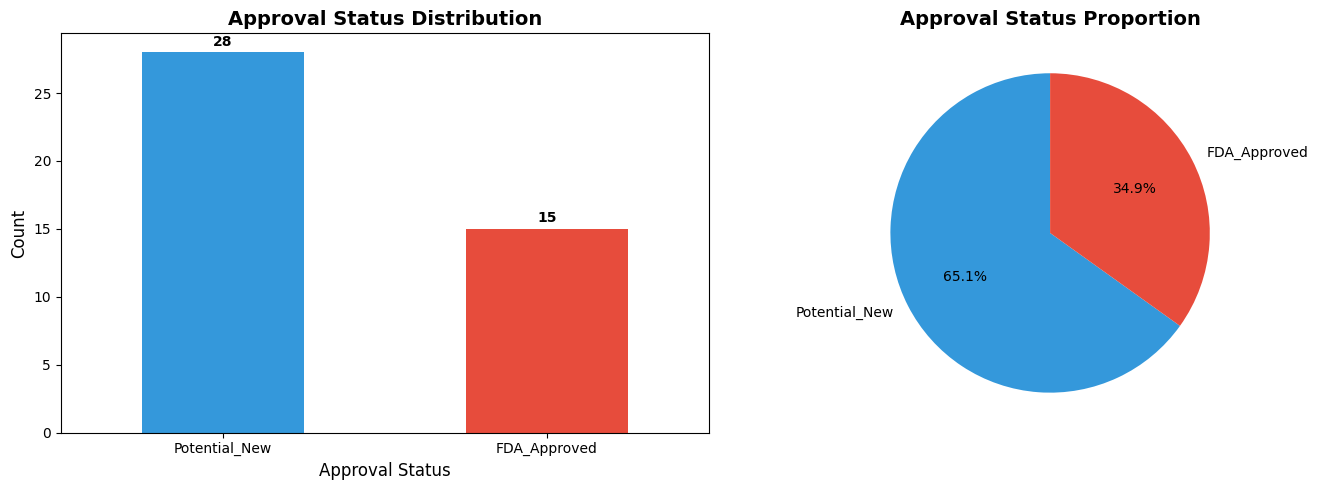

In [85]:
# Approval Status Distribution
print("\n1. APPROVAL STATUS DISTRIBUTION")
print("-" * 80)
approval_counts = df_excipients['Approval_Status'].value_counts()
print(approval_counts)
print(f"\nPercentages:")
print((approval_counts / len(df_excipients) * 100).round(2))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
approval_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#f39c12'])
axes[0].set_title('Approval Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Approval Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')
for i, v in enumerate(approval_counts):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# Pie chart
colors_pie = ['#3498db', '#e74c3c', '#f39c12']
axes[1].pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors_pie)
axes[1].set_title('Approval Status Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 10\. EDA: Chemical Category and Primary Function Analysis

This section of the Exploratory Data Analysis (EDA) focuses on characterizing the excipients based on their **chemical composition** and **intended role** (primary function).

-----

### 10.1. Chemical Category Distribution

The distribution of excipients across different chemical categories is analyzed using a horizontal bar chart. This visualization clearly highlights which chemical classes are most represented in the dataset.


2. CHEMICAL CATEGORY DISTRIBUTION
--------------------------------------------------------------------------------


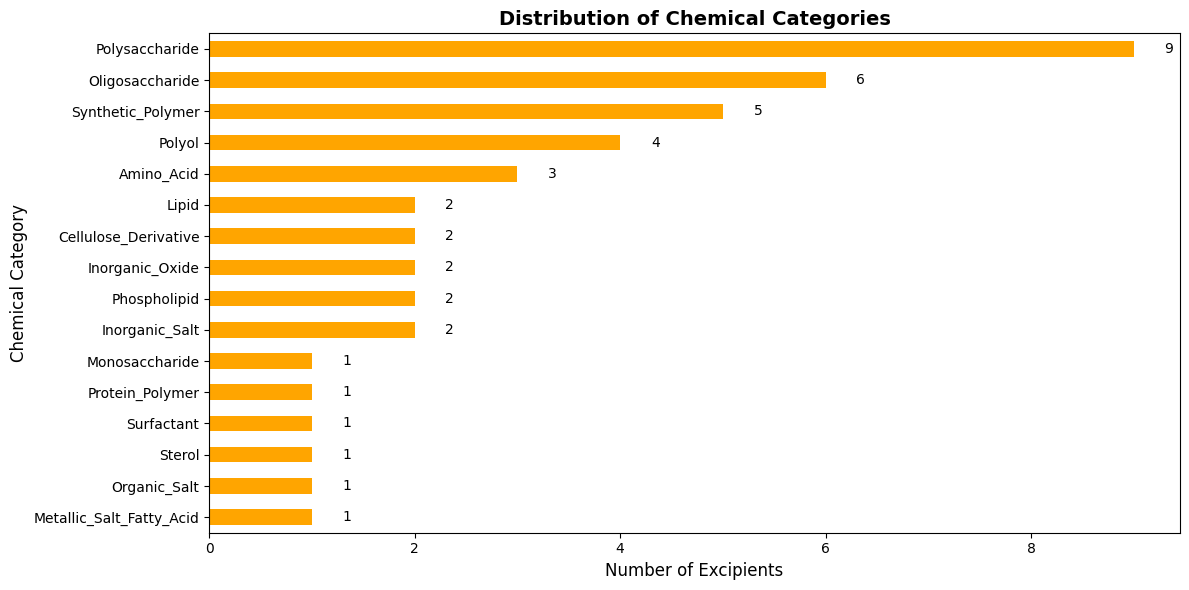

In [86]:
# Chemical Category Distribution
print("\n2. CHEMICAL CATEGORY DISTRIBUTION")
print("-" * 80)
category_counts = df_excipients['Chemical_Category'].value_counts().sort_values(ascending=True)

# Visualize
plt.figure(figsize=(12, 6))
category_counts.plot(kind='barh', color='orange')
plt.title('Distribution of Chemical Categories', fontsize=14, fontweight='bold')
plt.xlabel('Number of Excipients', fontsize=12)
plt.ylabel('Chemical Category', fontsize=12)
for i, v in enumerate(category_counts):
    plt.text(v + 0.3, i, str(v), va='center')
plt.tight_layout()
plt.show()

### 10.2. Decomposing Primary Function

Many excipients have multiple uses, listed in the `Primary_Function` column separated by a forward slash (`/`). To accurately analyze the functional roles, this column is **decomposed** and **standardized** through the following steps:

1.  **Splitting and Exploding:** The `Primary_Function` string is split by the `/` delimiter, and the resulting list is "exploded" into multiple rows. This creates a new temporary DataFrame (`functions_split`) where each row represents a single functional role for an excipient. This is a crucial step for **multi-label categorical analysis**.
2.  **Cleaning and Filtering:** The individual function names are cleaned of leading/trailing whitespace, and placeholder strings like `'None'`, `'Not_Mentioned'`, and `'Not_Applicable'` are filtered out.

The resulting `functions_final` DataFrame allows for an accurate count of how often each specific functional role (e.g., 'Stabilizer', 'Carrier', 'Surfactant') appears across the entire excipient list.

In [87]:
# 1. Split the 'Primary_Function' string by '/' and explode the list into new rows
# We ensure the original columns are kept for the merge/hue later.
functions_split = df_excipients.assign(Function_List= df_excipients['Primary_Function'].str.split('/'))\
                    .explode('Function_List')

# 2. Clean and standardize the individual function names
functions_split['Function'] = functions_split['Function_List'].str.strip()

# 3. Define and apply cleanup list to remove placeholders, including empty strings from splitting
cleanup_list = ['None', 'Not_Mentioned', 'Not_Applicable', 'Excipient', '']
functions_final = functions_split[~functions_split['Function'].isin(cleanup_list)].copy()

functions_final.head()

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function,Function_List,Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,H-2,Carrier,Carrier,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent,Stabilizer,Stabilizer
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent,Osmotic_Agent,Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier,Carrier,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,-42,H-1,Bulking_Agent,Bulking_Agent,Bulking_Agent


## 11\. Multivariate EDA: Function vs. Approval Status

This step provides a key insight into the relationship between the **intended use** of an excipient and its **regulatory status**. By analyzing the decomposed `Primary_Function` column, we can determine which functional roles are most common and whether their distribution varies based on FDA approval.

### 11.1. Top Functional Roles and Regulatory Comparison

1.  **Ranking:** The frequency of all cleaned functional roles is calculated, and the **Top 10** most frequent functions are selected for visualization.
2.  **Visualization:** A stacked horizontal bar chart  is generated using `seaborn.countplot`. This plot shows the total count for each of the top 10 functions, segmented by the `Approval_Status` (e.g., 'FDA\_Approved', 'GRAS').

The visualization allows for immediate interpretation of the functional profile of the excipient population, highlighting functions like **'Stabilizer'** or **'Carrier'** as highly dominant, and confirming that the majority of instances across all major functional categories are already FDA-approved.

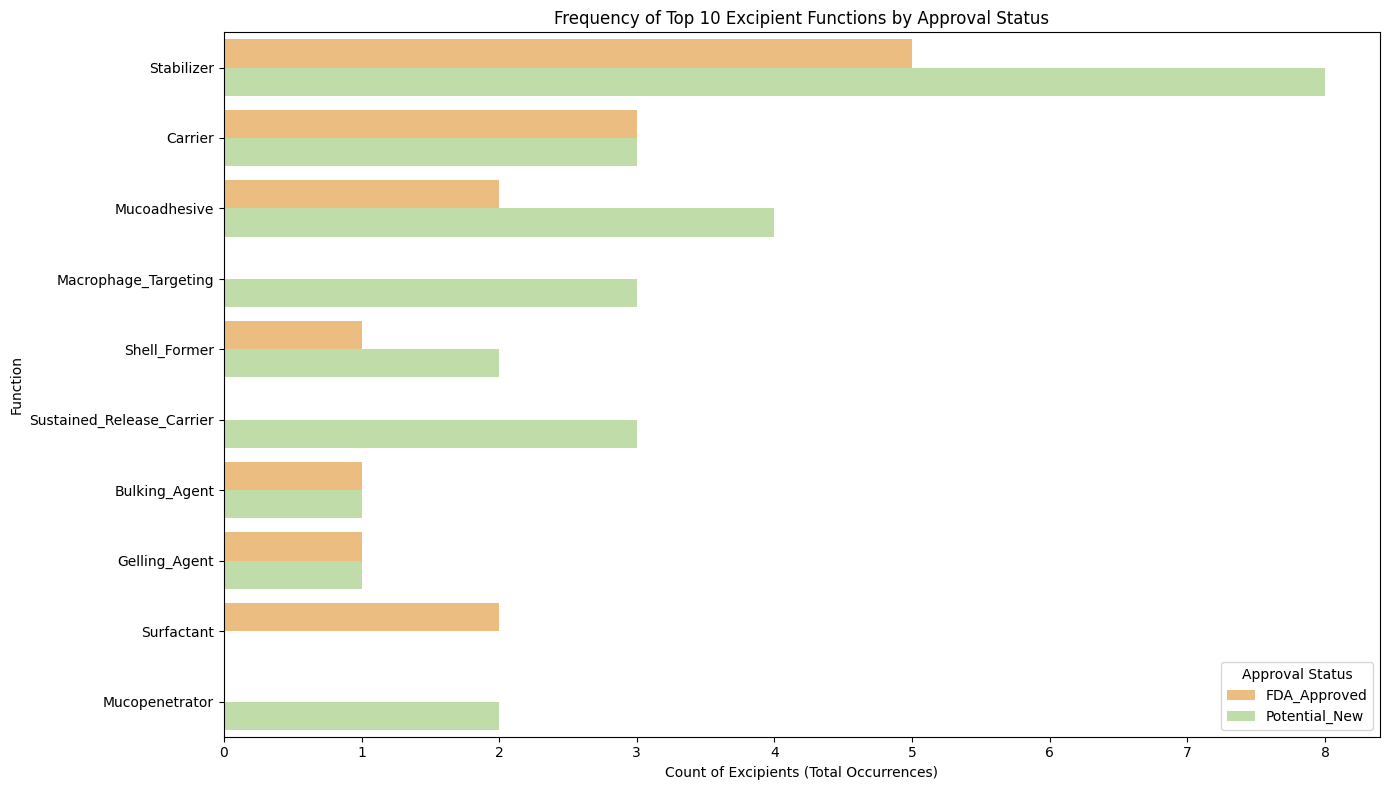

In [88]:
# --- Analysis and Visualization ---

# 4. Calculate the rank of the most frequent functions (Top 10 for plotting clarity)
top_functions_list = functions_final['Function'].value_counts().head(10).index.tolist()

# 5. Filter the data to include only the top functions
df_top_functions = functions_final[functions_final['Function'].isin(top_functions_list)]

# 6. Plot the ranked frequency, correlated with approval status
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df_top_functions, 
    y='Function', 
    hue='Approval_Status', 
    order=top_functions_list, # Orders the bars by overall frequency
    palette='Spectral'
)
plt.title('Frequency of Top 10 Excipient Functions by Approval Status')
plt.xlabel('Count of Excipients (Total Occurrences)')
plt.ylabel('Function')
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

## 12\. EDA: Hygroscopicity Distribution Analysis

The `Hygroscopicity` property, a key concern in raw material handling (Chaves et al., 2022), is an **ordinal categorical variable** (H-1 to H-4). This section focuses on preparing and visualizing this classification.

### 12.1. Data Preparation for Ordinal Analysis

Before visualization, the data is prepared to respect its inherent order:

  * **Ordering:** The categories (`H-1`, `H-2`, `H-3`, `H-4`) are explicitly defined as **ordered categorical** data in pandas (`Hygroscopicity\_ordered`). This ensures that future visualizations and statistical methods correctly interpret H-4 as "higher" than H-1.
  * **Numerical Mapping:** A numerical mapping (`H-1`: 1, `H-4`: 4) is created (`Hygro\_Numeric`), which is essential for any quantitative analysis (e.g., correlation, regression) that may be performed later.
  * **Filtering:** A subset (`df\_known\_hygro`) is created by temporarily removing 'Not\_Mentioned' entries to focus on excipients with established classifications.

### 12.2. Visualizing the Ordinal Distribution

The distribution is visualized using a bar chart with a color gradient.  The gradient (e.g., blue to red) reinforces the ordinal nature of the data, visually linking the color intensity to the moisture sensitivity level. The plot shows the count and percentage for each classification.

HYGROSCOPICITY DISTRIBUTION ANALYSIS

Frequency Distribution:
Hygroscopicity_ordered
H-1               6
H-2               2
H-3               4
H-4               4
Not_Mentioned    25
Name: count, dtype: int64

Percentages:
Hygroscopicity_ordered
H-1              13.95
H-2               4.65
H-3               9.30
H-4               9.30
Not_Mentioned    58.14
Name: count, dtype: float64


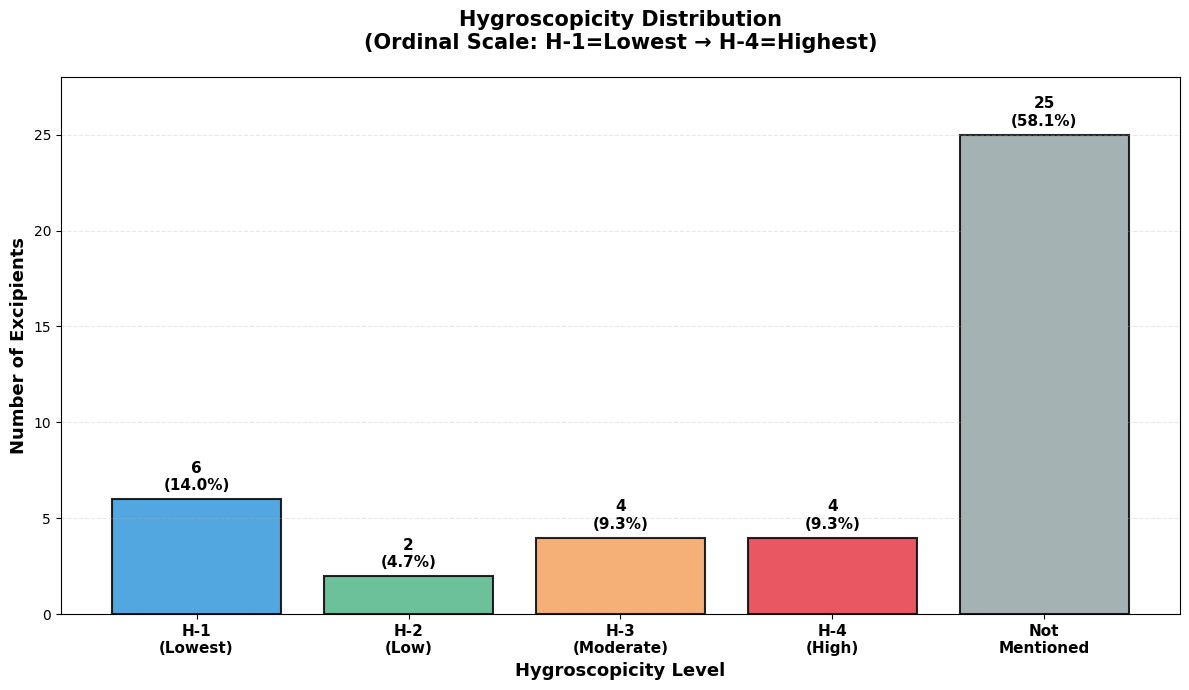

In [89]:
# Define proper ordering for hygroscopicity levels
hygro_order = ['H-1', 'H-2', 'H-3', 'H-4', 'Not_Mentioned']
hygro_labels = ['H-1\n(Lowest)', 'H-2\n(Low)', 'H-3\n(Moderate)', 'H-4\n(High)', 'Not\nMentioned']

# Filter out Not_Mentioned for these analyses
df_known_hygro = df_excipients[df_excipients['Hygroscopicity'] != 'Not_Mentioned'].copy()

# Create ordered categorical
df_excipients['Hygroscopicity_ordered'] = pd.Categorical(df_excipients['Hygroscopicity'], 
                                               categories=hygro_order, 
                                               ordered=True)

# Map to numeric for statistical tests (excluding Not_Mentioned)
hygro_numeric_map = {'H-1': 1, 'H-2': 2, 'H-3': 3, 'H-4': 4}
df_excipients['Hygro_Numeric'] = df_excipients['Hygroscopicity'].map(hygro_numeric_map)

# Count frequencies
hygro_counts = df_excipients['Hygroscopicity_ordered'].value_counts().sort_index()

print("="*80)
print("HYGROSCOPICITY DISTRIBUTION ANALYSIS")
print("="*80)
print("\nFrequency Distribution:")
print(hygro_counts)
print(f"\nPercentages:")
print((hygro_counts / len(df_excipients) * 100).round(2))

# ============================================================================
# VISUALIZATION 1: GRADIENT BAR CHART (RECOMMENDED FOR ORDINAL DATA)
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Color gradient from light blue to dark red (low to high hygroscopicity)
colors = ['#3498db', '#52b788', '#f4a261', '#e63946', '#95a5a6']

bars = ax.bar(range(len(hygro_counts)), hygro_counts.values, color=colors, 
              edgecolor='black', linewidth=1.5, alpha=0.85)

# Customize
ax.set_xticks(range(len(hygro_counts)))
ax.set_xticklabels(hygro_labels, fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Excipients', fontsize=13, fontweight='bold')
ax.set_xlabel('Hygroscopicity Level', fontsize=13, fontweight='bold')
ax.set_title('Hygroscopicity Distribution\n(Ordinal Scale: H-1=Lowest → H-4=Highest)', 
             fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, hygro_counts.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{count}\n({count/len(df_excipients)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
    

ax.set_ylim(0, max(hygro_counts.values) + 3)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('hygroscopicity_gradient_bar.png', dpi=300, bbox_inches='tight')
plt.show()

## 13\. Cross-Feature Analysis: Exploring Relationships

To move beyond univariate analysis, this section investigates the interplay between key excipient attributes: **Chemical Category**, **Hygroscopicity**, and **Approval Status**. Understanding these correlations is crucial for identifying trends relevant to formulation and regulatory strategy.

-----

### 13.1. Chemical Category vs. Hygroscopicity

The relationship between the excipient's fundamental **chemical structure** and its **moisture sensitivity** is visualized using a **Heatmap**.

1.  **Contingency Table (Crosstab):** A contingency table (`ct_cat`) is created to count the number of excipients in each combination of `Chemical_Category` and `Hygroscopicity` class (`H-1` to `H-4`).
2.  **Visualization:** The heatmap visually represents these counts, with darker colors indicating a higher concentration of excipients.  This quickly reveals which chemical classes are strongly associated with particular hygroscopicity levels (e.g., highly complex polymers might cluster in the higher $H$ classes).

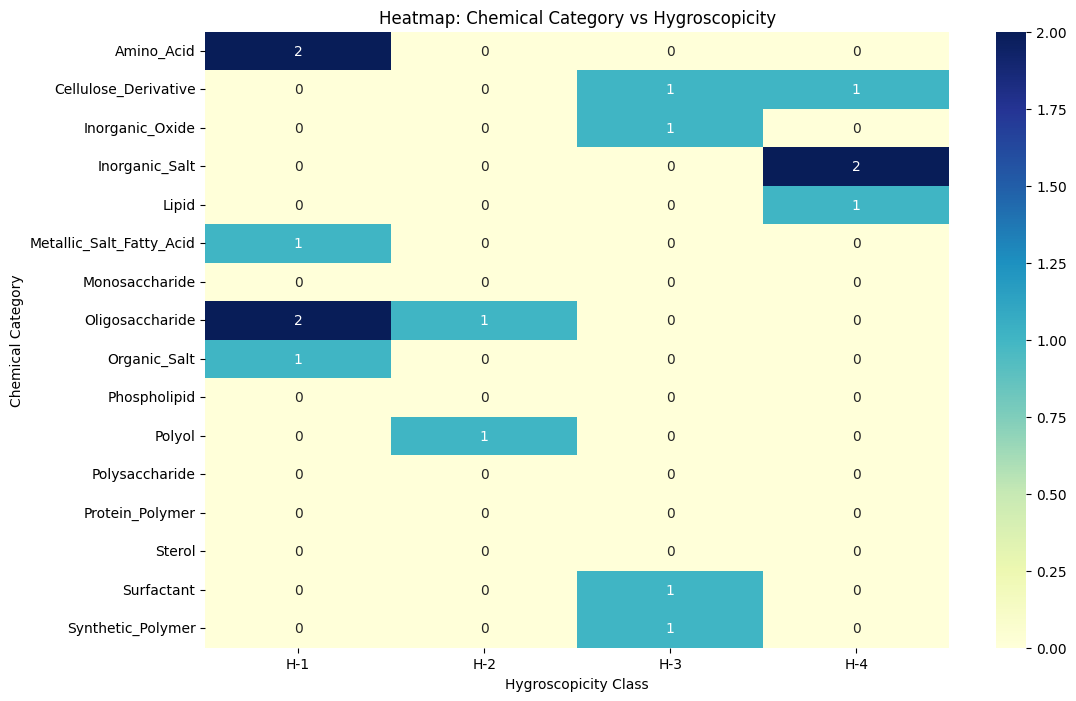

In [90]:
order_hygro = ['H-1', 'H-2', 'H-3', 'H-4']
ct_cat = pd.crosstab(df_excipients['Chemical_Category'], df_excipients['Hygroscopicity'])
ct_cat = ct_cat[[c for c in order_hygro if c in ct_cat.columns]] # Reorder columns

plt.figure(figsize=(12, 8))
sns.heatmap(ct_cat, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap: Chemical Category vs Hygroscopicity')
plt.ylabel('Chemical Category')
plt.xlabel('Hygroscopicity Class')
plt.show()

Insight: This visualization highlights clusters. For instance, Inorganic Salts often appear in the H-4 (very hygroscopic) column, whereas amino acids and oligosaccharides might cluster in H-1 (hydrophobic).

### 14.2. Approval Status vs. Chemical Category Composition

This analysis compares the **chemical makeup** of excipients based on their `Approval_Status`. This is particularly insightful for determining if excipients with less common approval statuses (e.g., potential new materials) show a distinctly different chemical profile than the established **FDA\_Approved** population.

1.  **Normalization:** A contingency table (`ct`) is generated and then normalized **row-wise** (`ct_norm`). This is critical because it converts the absolute counts into **percentages of the group's total**. For example, it tells us: "Of all **FDA\_Approved** excipients, $X\%$ are Oligosaccharides."
2.  **Visualization:** A **stacked bar chart** is used to display this percentage composition. The height of each stack segment shows the proportion of a specific chemical category within that `Approval_Status` group.

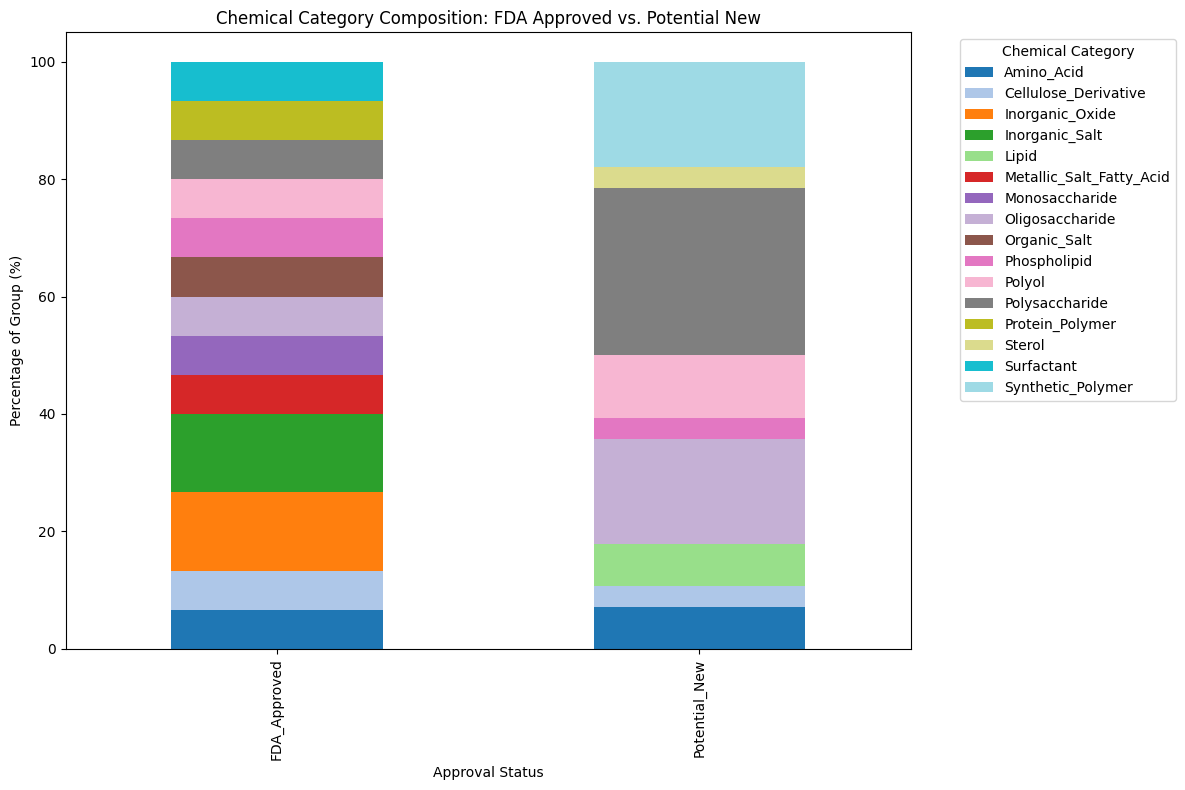

In [91]:
# 1. Create a crosstab (Count of Category per Status)
ct = pd.crosstab(df_excipients['Approval_Status'], df_excipients['Chemical_Category'])

# 2. Normalize to percentages (Row-wise)
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot
ax = ct_norm.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Chemical Category Composition: FDA Approved vs. Potential New')
plt.xlabel('Approval Status')
plt.ylabel('Percentage of Group (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Chemical Category')
plt.tight_layout()
plt.show()

## 14\. Functional Co-occurrence Analysis

The final step in the Exploratory Data Analysis is to perform a **functional co-occurrence analysis**. This advanced technique reveals which excipient functions are most commonly **paired together** within the dataset, providing insights into synergistic or mandatory functional combinations in pharmaceutical formulations.

-----

### 14.1. Creating the Binary Function Matrix

Before calculating co-occurrence, the previously split function data (`functions_split`) must be cleaned and restructured:

1.  **Final Cleaning:** Any remaining empty strings resulting from the splitting process are removed to ensure a clean list of functions (`functions_clean`).
2.  **Binary Matrix Creation:** A **Binary Function Matrix** (`func_matrix`) is created using a cross-tabulation of `Excipient_ID` and `Function`. In this matrix, each row is a unique excipient, and each column is a unique function. A value of **1** indicates the excipient possesses that function, and **0** indicates it does not.

In [92]:

# Drop empty rows resulting from the cleanup/split
functions_clean = functions_split[functions_split['Function'].str.len() > 0].copy()

# Clean whitespace and drop empty rows resulting from the cleanup/split
functions_split['Function'] = functions_split['Function_List'].str.strip()
functions_clean = functions_split[functions_split['Function'].str.len() > 0].copy()

# Optional: Drop the temporary Function_List column
functions_clean.drop(columns=['Function_List'], inplace=True)

print(functions_clean[['Excipient_ID', 'Function']].head())

  Excipient_ID       Function
0       EXC001        Carrier
1       EXC002     Stabilizer
1       EXC002  Osmotic_Agent
2       EXC003        Carrier
3       EXC004  Bulking_Agent


In [93]:
functions_clean.head()

,Excipient_ID,Excipient_Name,Chemical_Category,Approval_Status,Tg_C,Hygroscopicity,Primary_Function,Function
0,EXC001,Lactose,Oligosaccharide,FDA_Approved,111.8,H-2,Carrier,Carrier
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent,Stabilizer
1,EXC002,Mannitol,Polyol,FDA_Approved,11.0,H-2,Stabilizer/Osmotic_Agent,Osmotic_Agent
2,EXC003,Glucose,Monosaccharide,FDA_Approved,38.2,Not_Mentioned,Carrier,Carrier
3,EXC004,Glycine,Amino_Acid,FDA_Approved,-42,H-1,Bulking_Agent,Bulking_Agent


In [94]:
# Create the Binary Function Matrix (1 if function is present, 0 otherwise)
func_matrix = pd.crosstab(functions_clean['Excipient_ID'], functions_clean['Function'])

# Display the matrix head (Excipient ID as rows, Function as columns)
print("\nBinary Function Matrix Head:")
print(func_matrix.head())


Binary Function Matrix Head:
Function      Anti-Hygroscopic_Agent  Antimicrobial  Antioxidant  Buffer  \
Excipient_ID                                                               
EXC001                             0              0            0       0   
EXC002                             0              0            0       0   
EXC003                             0              0            0       0   
EXC004                             0              0            0       0   
EXC005                             0              0            0       0   

Function      Bulking_Agent  CD44_Ligand  Carrier  Cryoprotectant  \
Excipient_ID                                                        
EXC001                    0            0        1               0   
EXC002                    0            0        0               0   
EXC003                    0            0        1               0   
EXC004                    1            0        0               0   
EXC005                 

### 14.2. Computing and Visualizing Co-occurrence

The co-occurrence matrix is generated using **matrix multiplication** (`func_matrix.T.dot(func_matrix)`).

  * **Matrix Multiplication:** The product of the transpose of the function matrix and the original matrix results in a symmetrical $N \times N$ matrix (where $N$ is the number of unique functions). The value in cell $(i, j)$ represents the number of excipients that possess **both function $i$ and function $j$**.
  * **Diagonal Exclusion:** The diagonal elements are set to **zero** because they represent the co-occurrence of a function with itself (which is always equal to its total count), and we are only interested in **paired** functions.
  * **Visualization (Heatmap):** A heatmap  provides an immediate visual summary, highlighting the most frequently co-occurring functional pairs with darker shading.

This analysis provides the final data-driven insight, completing the deep exploration of the dataset's structural, physical, and functional characteristics.

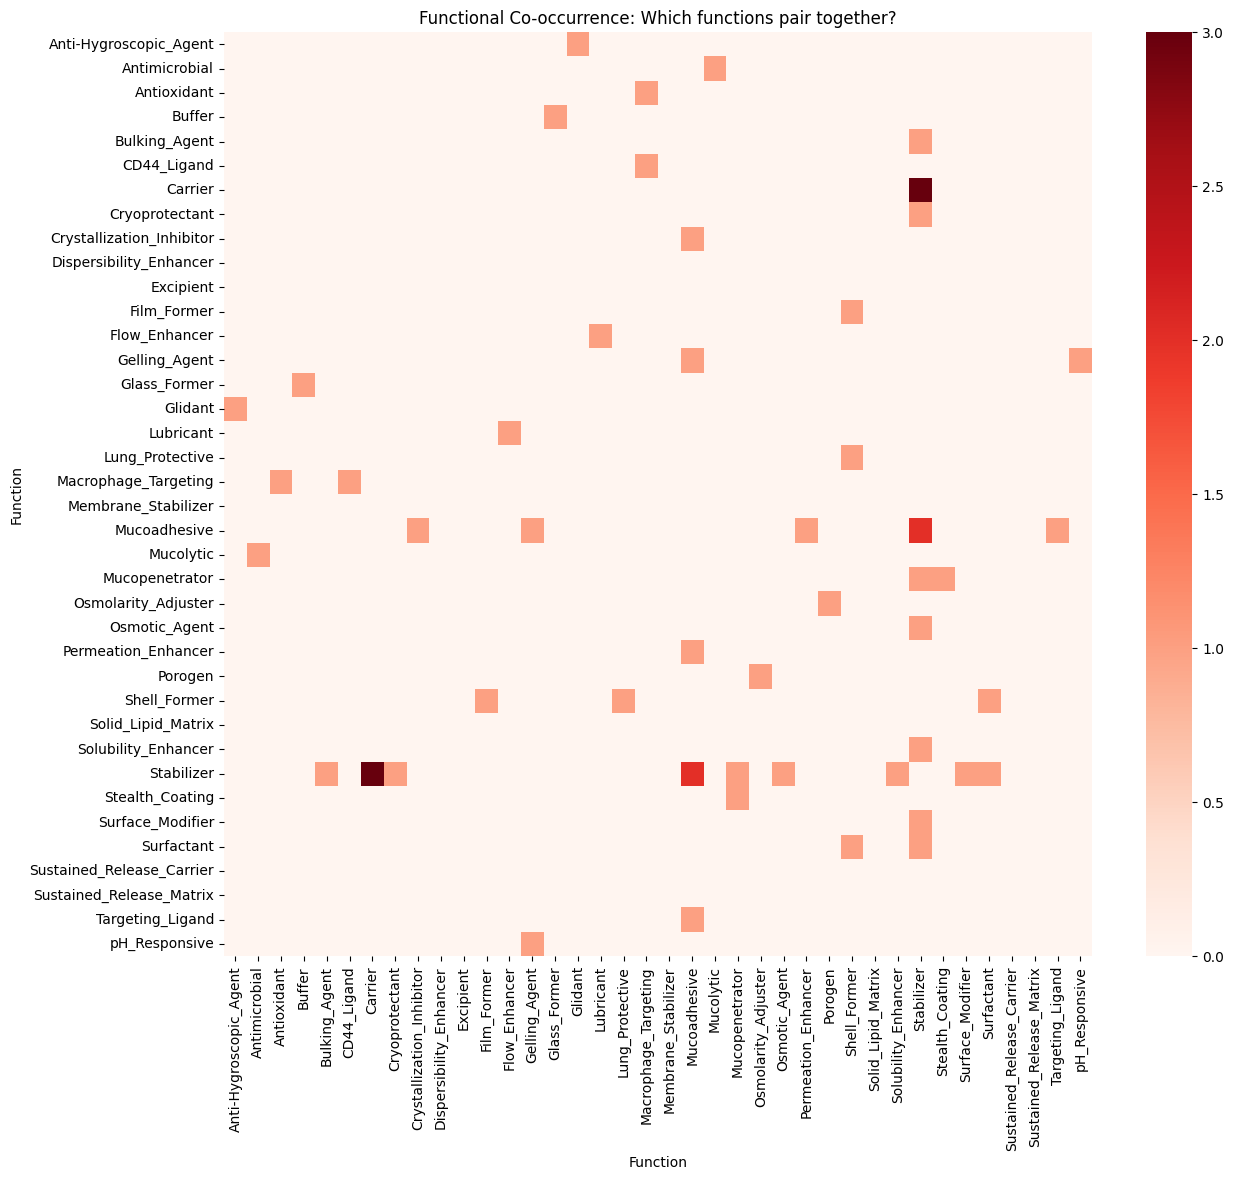

In [95]:
# Compute the Co-occurrence Matrix (Transpose of Matrix DOT Matrix)
co_occurrence = func_matrix.T.dot(func_matrix)

# Set diagonal to 0, as we only care about co-occurrence with *other* functions
import numpy as np
np.fill_diagonal(co_occurrence.values, 0)

plt.figure(figsize=(14, 12))
sns.heatmap(co_occurrence, cmap='Reds', annot=False) 
plt.title('Functional Co-occurrence: Which functions pair together?')
plt.show()

## 15\. Final Cross-Analysis: Chemical Category to Functional Map

The final exploratory analysis step creates a detailed **contingency map** between the fundamental **chemical structure** of the excipient and its **assigned functional roles**. This visual mapping is one of the most powerful insights for understanding structure-activity relationships in the dataset.

-----

### 15.1. Creating the Contingency Map

1.  **Cross-Tabulation:** A contingency table (`cat_func_map`) is generated, counting every instance where a specific `Chemical_Category` is associated with a specific `Function` within the `functions_clean` DataFrame.
2.  **Filtering:** To maximize clarity in the visualization, the table is filtered to remove rows and columns that contain only zeros. This ensures that the heatmap only displays chemical categories and functions that are actually present in the data.

### 15.2. Visualizing the Relationship

The relationship is visualized using a **Heatmap**  where the intensity of the blue color corresponds to the **count** of excipients that fit a particular chemical-functional pairing.

This matrix allows a formulation scientist (or reviewer) to quickly identify **stereotypical pairings** (e.g., Oligosaccharides serving as Carriers) and discover **unique pairings** that might represent excipients with novel or less common functionalities.

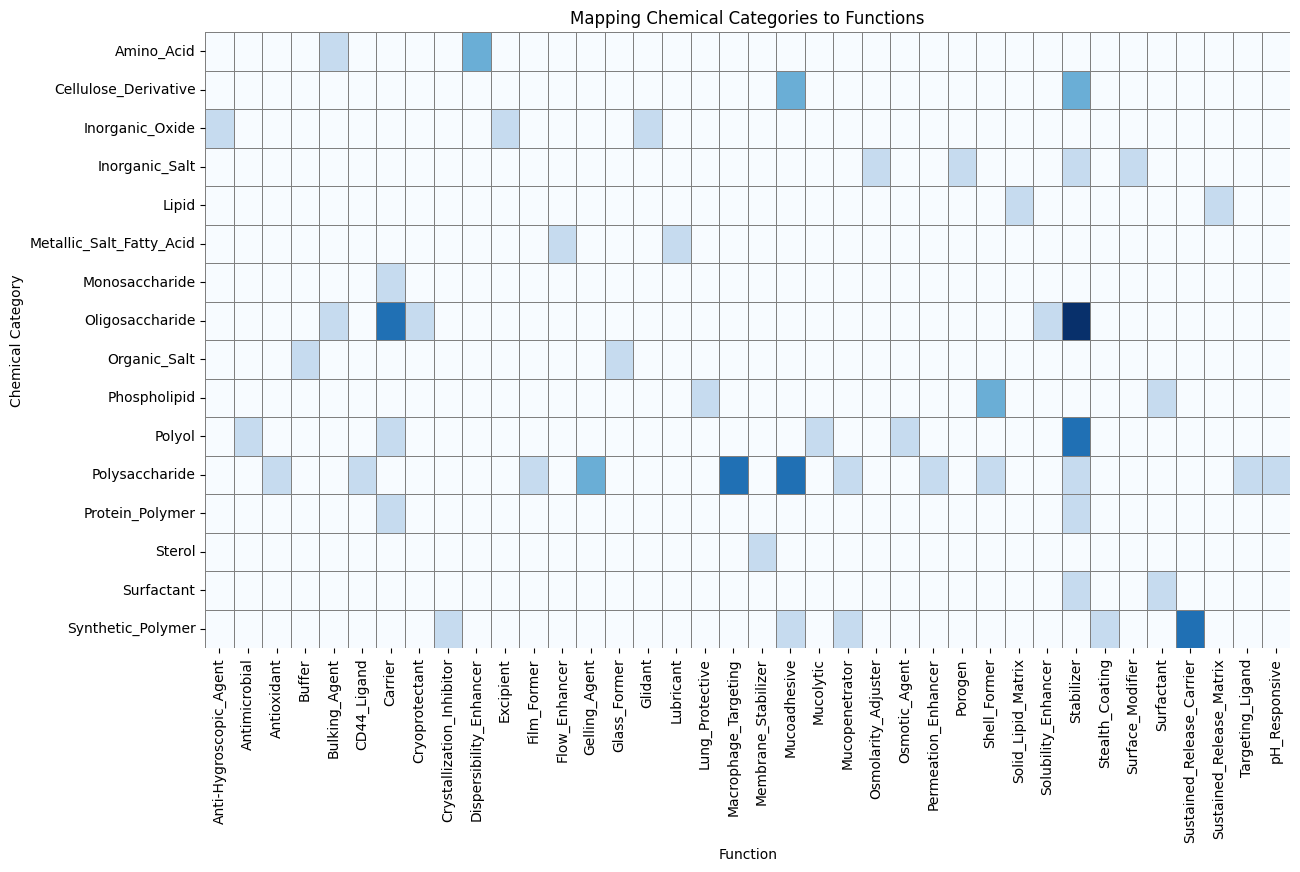

In [96]:
# Create a cross-tabulation of Chemical Category vs Function
cat_func_map = pd.crosstab(functions_clean['Chemical_Category'], functions_clean['Function'])

# Filter for readability (keep only rows/cols with data)
cat_func_map = cat_func_map.loc[(cat_func_map!=0).any(axis=1), (cat_func_map!=0).any(axis=0)]

plt.figure(figsize=(14, 8))
# Use a heatmap to visually map the relationship strength
sns.heatmap(cat_func_map, cmap='Blues', cbar=False, linewidths=.5, linecolor='gray')

plt.title('Mapping Chemical Categories to Functions')
plt.ylabel('Chemical Category')
plt.xlabel('Function')
plt.show()